In [1]:
# define bounding box
lat_bottom, lat_top = 33.9, 34.2
lon_bottom, lon_top = -118.4, -118.0
extent = (lon_bottom, lon_top, lat_bottom, lat_top)

# input data shape
dim = 200
frames_per_sample = 5

# date range of data
start_date, end_date = "2025-01-10-00", "2025-01-17-00"

In [2]:
from airnowdata import AirNowData
import time

start_time = time.time()
AD = AirNowData(
    start_date=start_date,
    end_date=end_date,
    extent=extent,
    airnow_api_key=None,
    save_dir="../data/airnow.json",
    frames_per_sample=frames_per_sample,
    dim=dim,
    elevation_path='../data/interpolation/elevation.npy',
    mask_path='../data/interpolation/mask.npy'
)
end_time = time.time()
print(f"Elapsed time: {(end_time - start_time):.0f}")

'../data/airnow.json' already exists; skipping request...
Elapsed time: 257


In [3]:
X_airnow = AD.data
print(X_airnow.shape)
print(AD.air_sens_loc)
print(AD.target_stations.shape)

(165, 5, 200, 200, 1)
{'North Holywood': (12, 18), 'Los Angeles - N. Main Street': (89, 86), 'Compton': (199, 97)}
(165, 3)


Displaying frames for example 102.


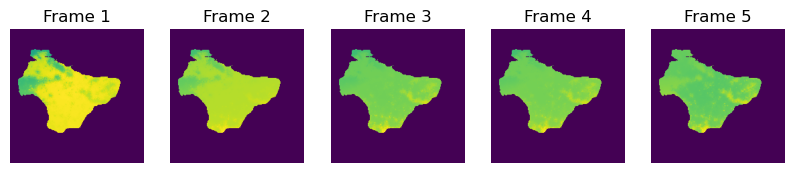

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

# Plot each of the sequential images for one random data example.
# plot hrrr channel
np.random.seed(42)
rand_sample = np.random.choice(range(len(X_airnow)), size=1)[0]
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(X_airnow[rand_sample, idx, :, :, 0]))
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {rand_sample}.")
plt.show()

In [6]:
# flip this if you wanna save the data
if False:
    np.save("/home/mgraca/data/precomputed/airnow_target_experiment_1.npy", AD.target_stations)
    np.save("/home/mgraca/data/precomputed/airnow_features_experiment_1.npy", AD.data)